In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.18.0


In [4]:
from tensorflow import keras


In [5]:
print(keras.__version__)

3.8.0


In [6]:
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical



Load and Preprocess the MNIST Dataset

In [8]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
x_train, x_test = x_train /255.0 ,   x_test/255.0

In [10]:
y_train = to_categorical(y_train, 10)

In [11]:
y_test = to_categorical(y_test, 10)

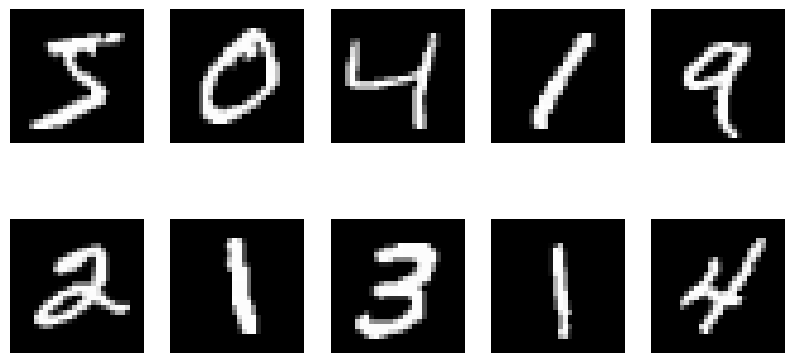

In [12]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
plt.show()


Load and Preprocess the MNIST Dataset

In [13]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the Model

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train the Model

In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8803 - loss: 0.4070 - val_accuracy: 0.9611 - val_loss: 0.1276
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9669 - loss: 0.1060 - val_accuracy: 0.9726 - val_loss: 0.0919
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9770 - loss: 0.0723 - val_accuracy: 0.9742 - val_loss: 0.0807
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9838 - loss: 0.0502 - val_accuracy: 0.9679 - val_loss: 0.1085
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9870 - loss: 0.0399 - val_accuracy: 0.9694 - val_loss: 0.1078
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9898 - loss: 0.0304 - val_accuracy: 0.9765 - val_loss: 0.0793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9787 - val_loss: 0.0792
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9918 - loss: 0.0

Evaluate the Model on Test Data

In [20]:
test_loss , test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.1068
Test accuracy: 97.76%


Visualize Training Performance

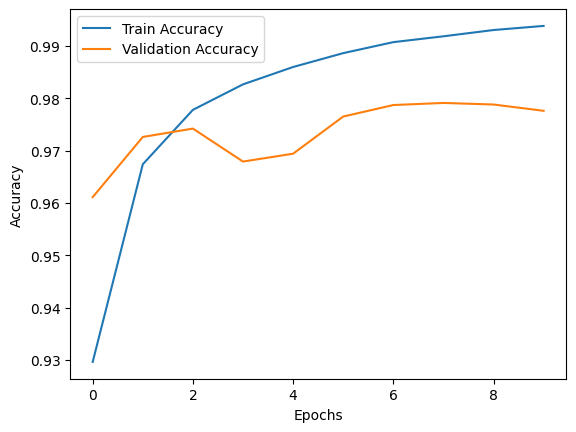

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Make Predictions on New Data

In [23]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted: 7, Actual: 7


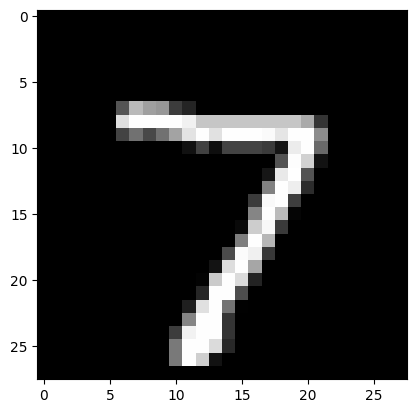

Predicted: 2, Actual: 2


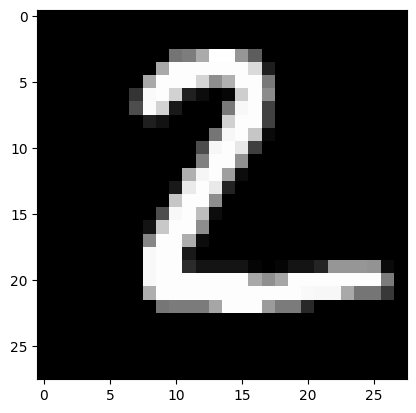

Predicted: 1, Actual: 1


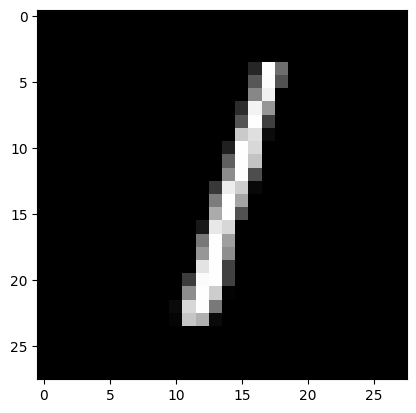

Predicted: 0, Actual: 0


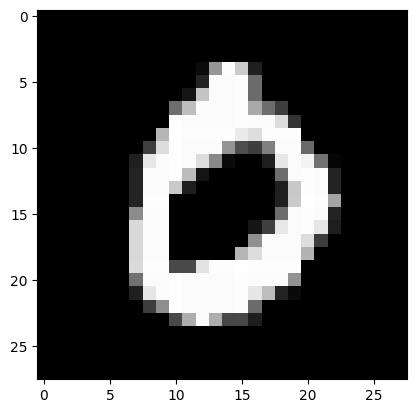

Predicted: 4, Actual: 4


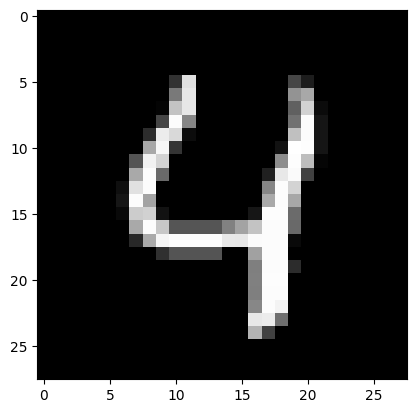

Predicted: 1, Actual: 1


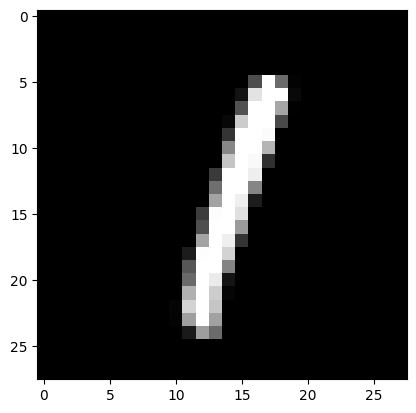

Predicted: 4, Actual: 4


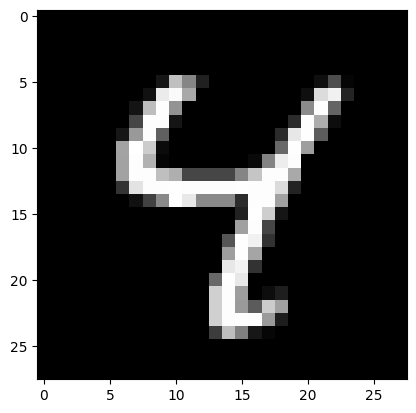

Predicted: 9, Actual: 9


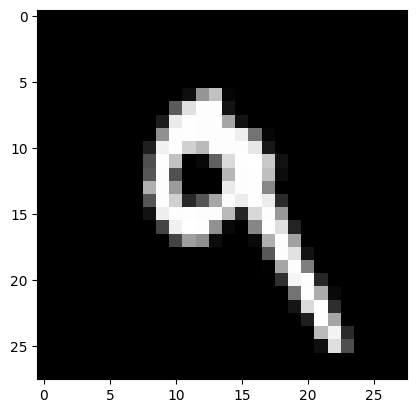

Predicted: 5, Actual: 5


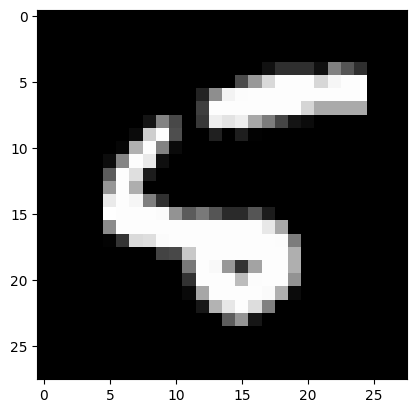

Predicted: 9, Actual: 9


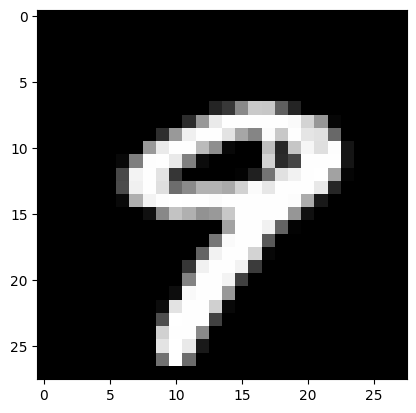

In [25]:
predictions = model.predict(x_test[:10])

for i,pred in enumerate(predictions):
  print(f'Predicted: {np.argmax(pred)}, Actual: {np.argmax(y_test[i])}')
  plt.imshow(x_test[i], cmap='gray')
  plt.show()